# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby('type').count()['ride_id']
# total_rides

In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby('type').sum()['driver_count']
# total_drivers

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby('type').sum()['fare']
# total_fares

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares / total_rides 
# average_fare_per_ride

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares / total_drivers 
# average_fare_per_driver

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
    {'Total_Rides': total_rides,
     'Total_Drivers':total_drivers,
     'Total_Fares':total_fares,
     'Average_Fare_per_Ride':average_fare_per_ride,
     'Average_Fare_per_Driver':average_fare_per_driver
      })
# pyber_summary_df

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total_Rides'] = pyber_summary_df['Total_Rides'].map("{:,}".format)

pyber_summary_df['Total_Drivers'] = pyber_summary_df['Total_Drivers'].map("{:,}".format)

pyber_summary_df['Total_Fares'] = pyber_summary_df['Total_Fares'].map("${:,.2f}".format)

pyber_summary_df['Average_Fare_per_Ride'] = pyber_summary_df['Average_Fare_per_Ride'].map("${:,.2f}".format)

pyber_summary_df['Average_Fare_per_Driver'] = pyber_summary_df['Average_Fare_per_Driver'].map("${:,.2f}".format)



In [11]:
# Display PyBer Summary
display(pyber_summary_df)

,Total_Rides,Total_Drivers,Total_Fares,Average_Fare_per_Ride,Average_Fare_per_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_pivot_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# pyber_pivot_df

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_by_date = pd.DataFrame(pyber_pivot_df.groupby(['type','date']).sum()['fare'])
# total_fare_by_date

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
total_fare_by_date.reset_index(inplace=True)
# total_fare_by_date

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_by_date_pivot = total_fare_by_date.pivot(index = 'date',columns = 'type', values='fare')
# total_fare_by_date_pivot.head(10)

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_total_fare_by_date_pivot = total_fare_by_date_pivot.loc['2019-01-01':'2019-04-29',:]
# new_total_fare_by_date_pivot

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_total_fare_by_date_pivot.index = pd.to_datetime(new_total_fare_by_date_pivot.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
new_total_fare_by_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_total_fare_by_date_pivot = new_total_fare_by_date_pivot.resample("W").sum()
# new_total_fare_by_date_pivot

In [20]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

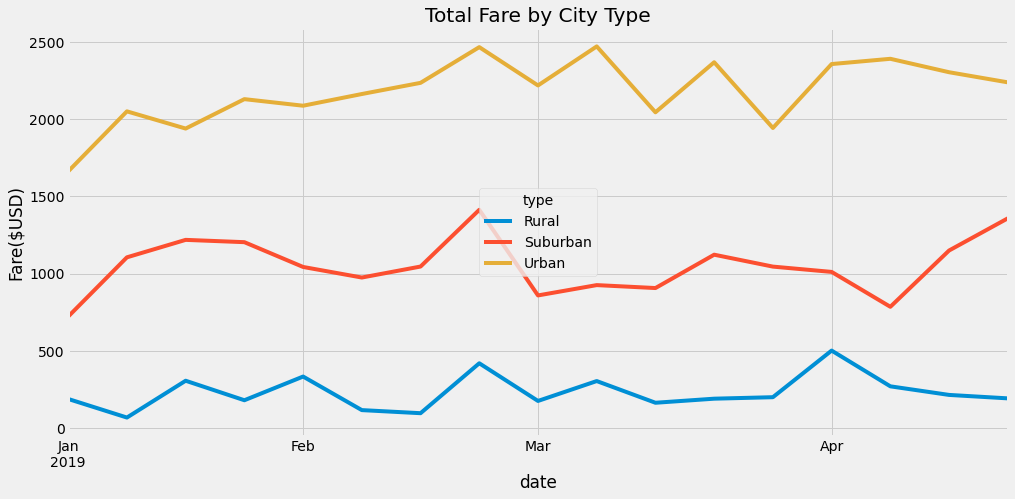

<Figure size 432x288 with 0 Axes>

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
new_total_fare_by_date_pivot.plot(
                                    kind = 'line',
                                    title = 'Total Fare by City Type',
                                    ylabel = 'Fare($USD)',
                                    figsize = (15,7)
                                    )
#Add legend to center with title
plt.legend(loc ='center', title = 'type')
# Save figure:PyBer_fare_summary.png in analysis 
plt.savefig('analysis/PyBer_fare_summary.png')

plt.show()
plt.tight_layout()